# Naive Bayes
---

**Naive Bayes Formula:**

$$ P(A|B) = \frac{P(B | A) \times P(A)}{P(B)} $$

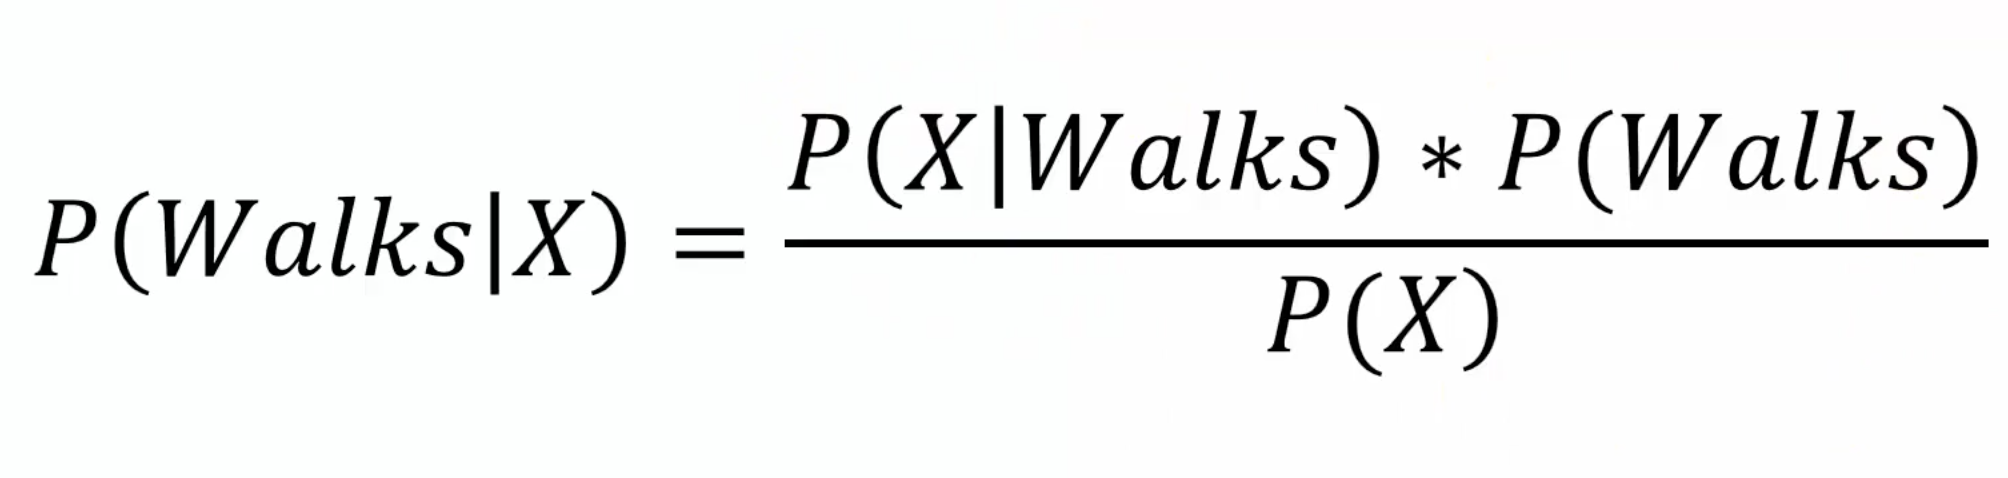

In [10]:
from IPython.display import Image
Image("img/Formula.png", width=500, height=350)

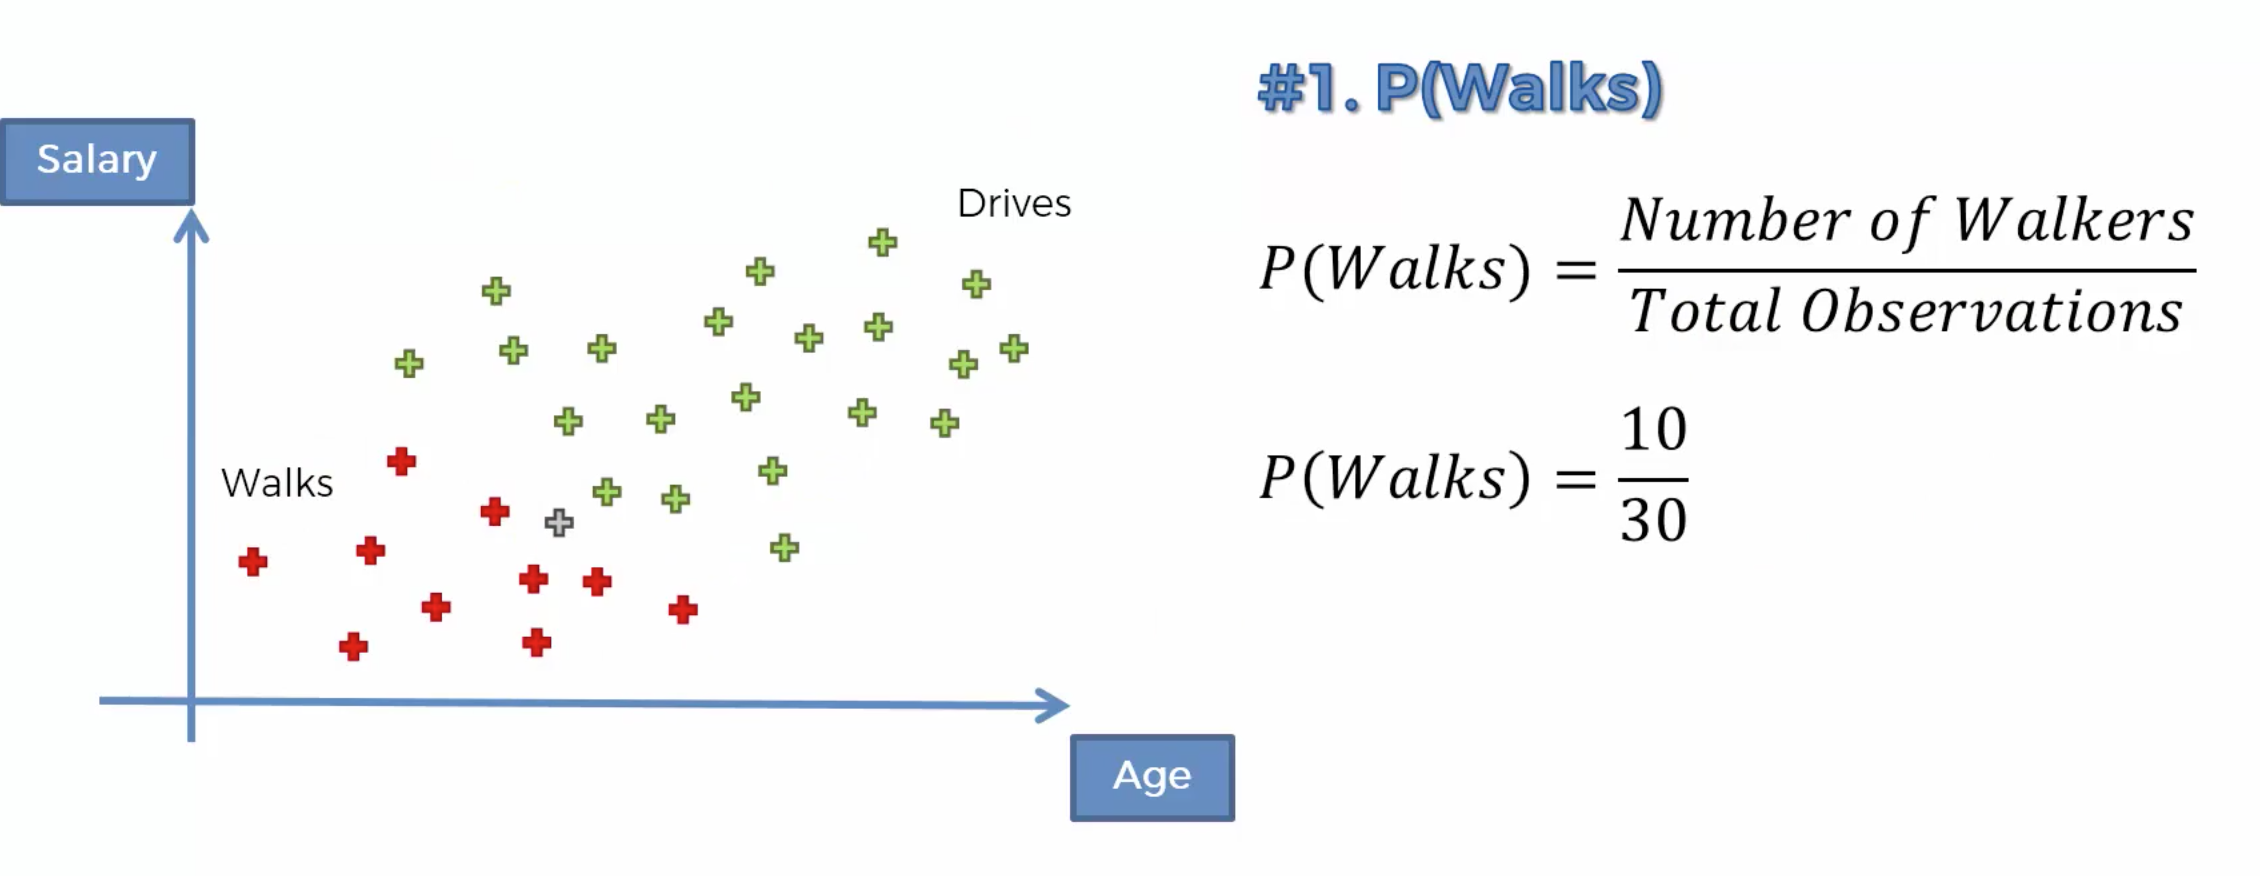

In [11]:
Image("img/1 Step.png", width=500, height=350)

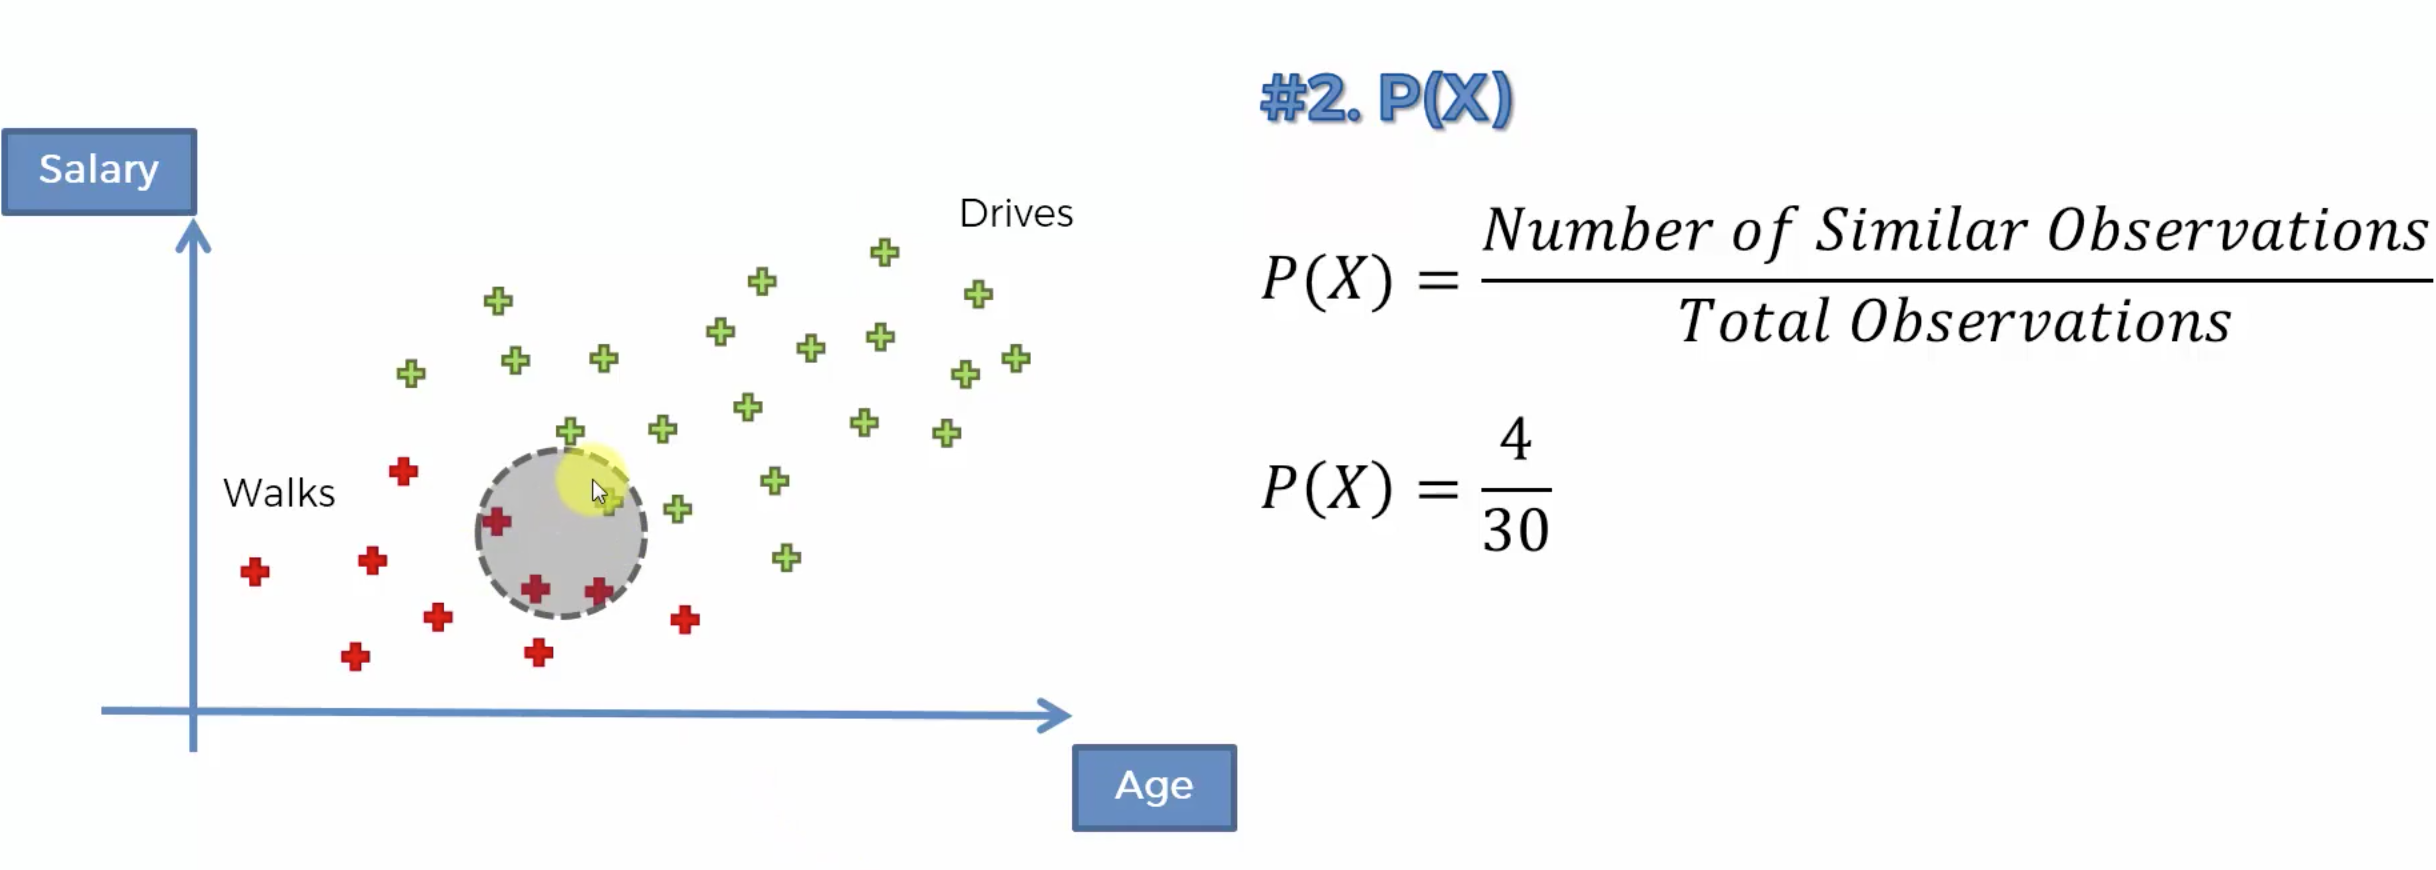

In [24]:
Image("img/2 Step.png", width=500, height=350)

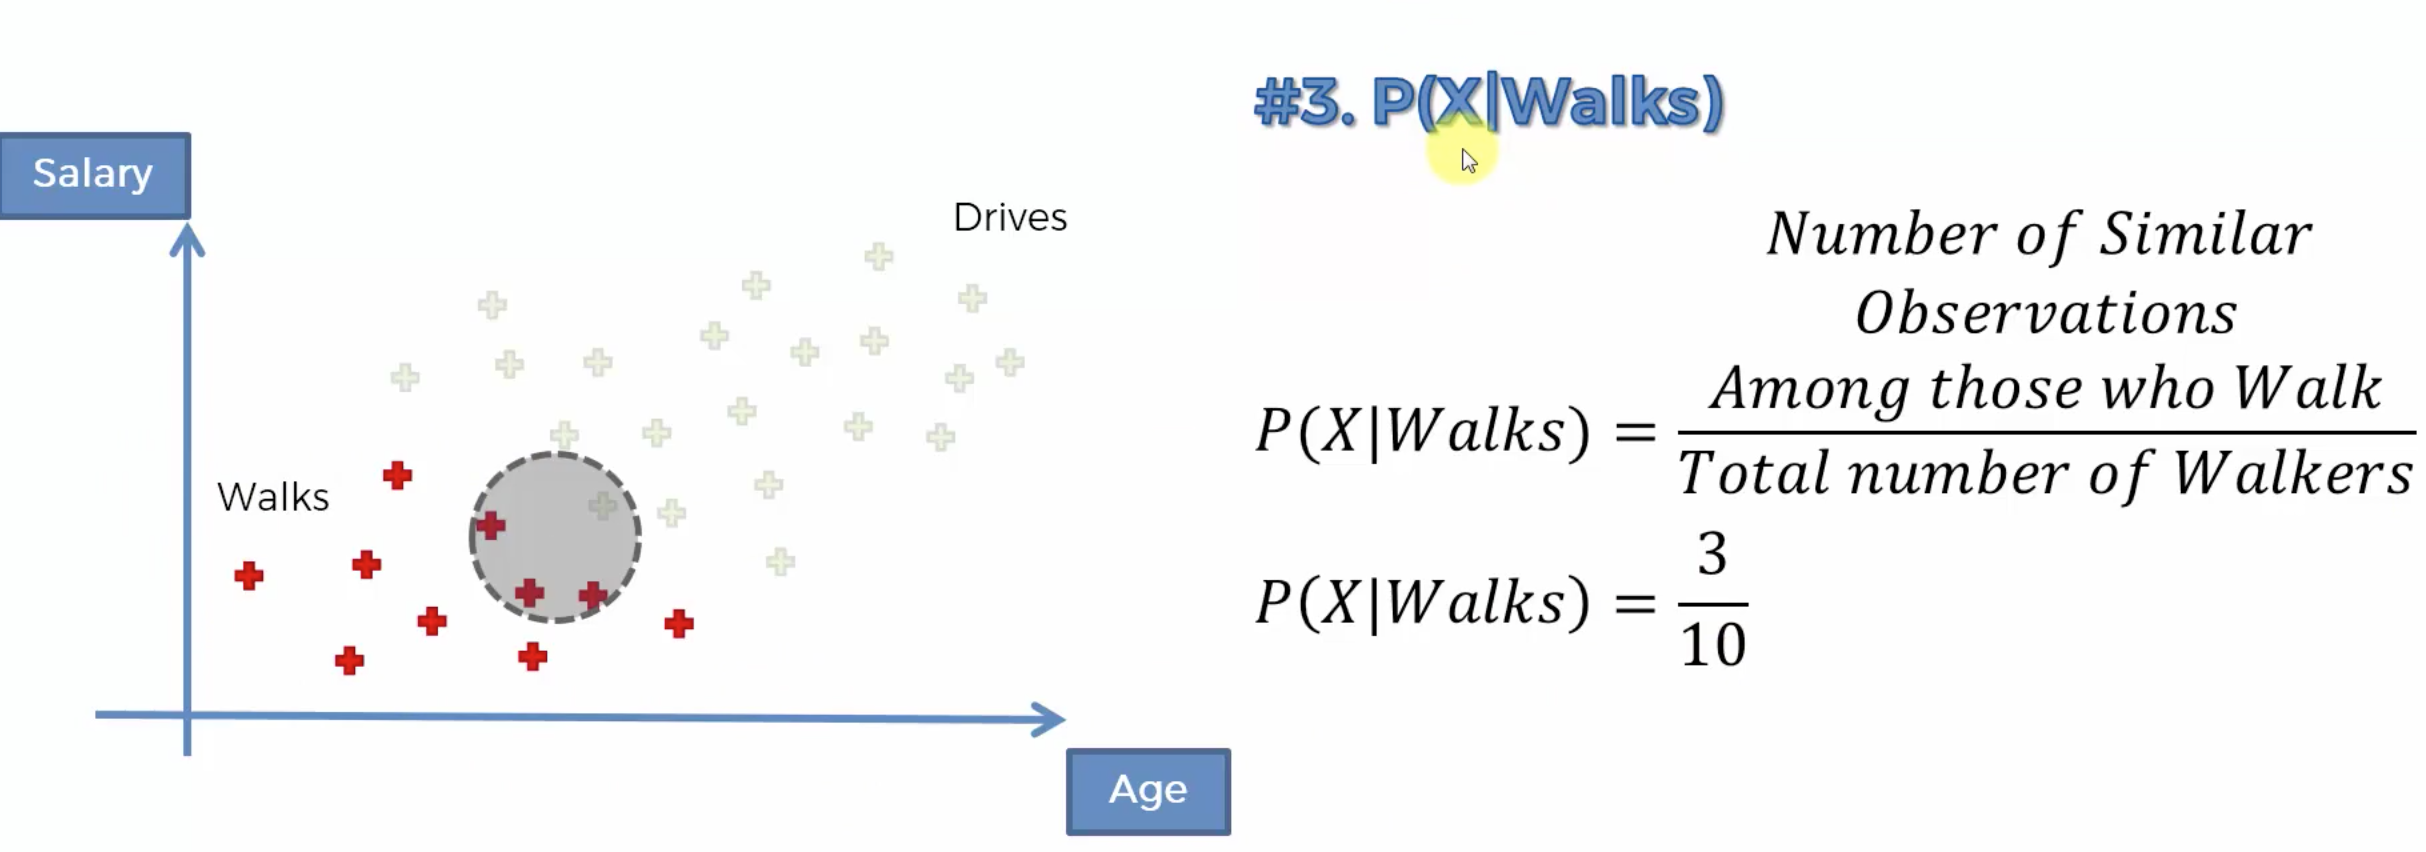

In [21]:
Image("img/3 Step.png", width=500, height=350)

**Importing the libraries:**

In [30]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

**Importing the dataset:**

In [2]:
dataset = pd.read_csv('Data/Social_Network_Ads.csv')
#dataset.fillna()
print(dataset.shape)
print(list(dataset.columns))
dataset.head(5)

(400, 5)
['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
#Check how many missing data we have
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [26]:
X = dataset.iloc[:, [2, 3]]
y = dataset.iloc[:, 4]

In [28]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(300, 2)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  7]
 [ 7 35]]


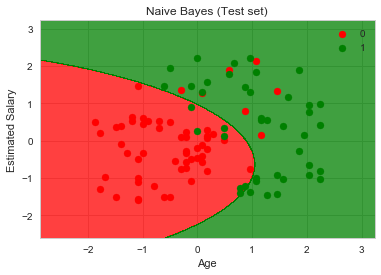

In [35]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()